# Lab 5: Singular Value Decomposition

In this lab, you will learn gain more experience with ranks and Singular Value Decomposition (SVD) and learn how to use SVD in data science.

## Lab 5.A: SVD Tutorial with Questions (25% of the lab grade)

Let us start by importing two libraries, numpy and matplotlib. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

First, we will learn how to create matrices of any dimension that have a specified rank. To create a rank-1 matrix $A_{nxm}$, it is sufficient to define two vectors, $u_{[nx1]}$ and $v_{[mx1]}$ and find their *outer product*, $A = u \cdot v^T$.

In [3]:
# A simple rank-1 matrix of dimension 5x4
u = np.transpose([[1,1,1,1,1]])
print 'vector u:  '
print u
v = np.transpose([[1,2,3,4]])
print 'vector v:   '
print v
A = np.dot(u,np.transpose(v))
print 'matrix A:   '
print  A
print 'rank of matrix A:   '
print  np.linalg.matrix_rank(A)
print 

# A more complicated rank-1 matrix of dimension 5x4
u = np.transpose([[1,2,3,4,5]])
print 'vector u:  '
print u
v = np.transpose([[1,2,3,4]])
print 'vector v:   '
print  v
A = np.dot(u,np.transpose(v))
print 'matrix A:   '
print A

print
print 'rank of matrix A:   '
print np.linalg.matrix_rank(A)
print 'size of A:'
print np.shape(A)
print 'type of objects u and A:'
print type(u), type(A)

vector u:  
[[1]
 [1]
 [1]
 [1]
 [1]]
vector v:   
[[1]
 [2]
 [3]
 [4]]
matrix A:   
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
rank of matrix A:   
1

vector u:  
[[1]
 [2]
 [3]
 [4]
 [5]]
vector v:   
[[1]
 [2]
 [3]
 [4]]
matrix A:   
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]
 [ 5 10 15 20]]

rank of matrix A:   
1
size of A:
(5L, 4L)
type of objects u and A:
<type 'numpy.ndarray'> <type 'numpy.ndarray'>


To generate a rank-2 matrix $A_{nxm}$, it is sufficient to define two pairs of vectors $(u_1,v_1)$ and $(u_2,v_2)$, where length of $u_1$ and $u_2$ is $n$ and length of $v_1$ and $v_2$ is $m$, calculate their *outer products* and add them up, $A = u_1 \cdot v_1^T + u_2 \cdot v_2^T$. 

In [4]:
# A simple rank-2 matrix of dimension 5x4
u1 = np.transpose([[1,1,1,1,1]])
u2 = np.transpose([[1,2,1,2,1]])
print 'vector u1:  '
print u1
print 'vector u2:  '
print u2
v1 = np.transpose([[1,0,2]])
v2 = np.transpose([[0,1,1]])
print 'vector v1:   '
print v1
print 'vector v2:   '
print v2
A = np.dot(u1,np.transpose(v1)) + np.dot(u2,np.transpose(v2))
print 'matrix A:   '
print  A
print 'rank of matrix A:   '
print  np.linalg.matrix_rank(A)
print 

vector u1:  
[[1]
 [1]
 [1]
 [1]
 [1]]
vector u2:  
[[1]
 [2]
 [1]
 [2]
 [1]]
vector v1:   
[[1]
 [0]
 [2]]
vector v2:   
[[0]
 [1]
 [1]]
matrix A:   
[[1 1 3]
 [1 2 4]
 [1 1 3]
 [1 2 4]
 [1 1 3]]
rank of matrix A:   
2



A more compact way to do exactly the same is to create a matrix $U$ by concatenating vectors $u_1$ and $u_2$ and matrix $V$ by concatenating vectors $v_1$ and $v_2$, as $U = [u_1 u_2]$ and $V = [v_1 v_2]$   

In [5]:
# An alternative way of creating a rank-2 matrix
U = np.concatenate((u1,u2), axis = 1)
print U
V = np.concatenate((v1,v2), axis = 1)
print V
A = np.dot(U,np.transpose(V))
print 'matrix A:   '
print  A
print 'rank of matrix A:   '
print  np.linalg.matrix_rank(A)
print 

[[1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]]
[[1 0]
 [0 1]
 [2 1]]
matrix A:   
[[1 1 3]
 [1 2 4]
 [1 1 3]
 [1 2 4]
 [1 1 3]]
rank of matrix A:   
2



**Question 1**. Explain why the previous 2 ways of creating the rank-2 matrix end up in exactly the same result. (*Note*: it is very important to understand why, so thake some time to think about it. It is acceptable to work out your explanation on a piece of paper and submit a photo of it as pdf file)

**Question 2**. Write a piece of code that generates a rank-3 matrix of dimension 6x5

**Question 1 Answer: **

The previous two ways are the same. In the first method, you explicity specifiy the vectors and the specific dot products. Those dot products are the same as matrix multiplication. In the second method, you set the vectors to be matrices and multiply them, resulting in an identical matrix A.

In [8]:
#Question 2 Answer

u1 = np.transpose([[1,1,1,1,1,1]])
u2 = np.transpose([[1,2,1,2,1,2]])
u3 = np.transpose([[1,3,0,2,1,1]])
v1 = np.transpose([[1,0,2,2,1]])
v2 = np.transpose([[0,1,1,2,2]])
v3 = np.transpose([[2,3,1,0,2]])

U = np.concatenate((u1,u2,u3), axis = 1)
V = np.concatenate((v1,v2,v3), axis = 1)

A = np.dot(U,np.transpose(V))
print A
print 'Rank of A: ' + str(np.linalg.matrix_rank(A))

[[ 3  4  4  4  5]
 [ 7 11  7  6 11]
 [ 1  1  3  4  3]
 [ 5  8  6  6  9]
 [ 3  4  4  4  5]
 [ 3  5  5  6  7]]
Rank of A: 3


Here is another way to quickly generate a large low-rank matrix. 

In [20]:
A = np.dot(np.transpose([[1,1,1,1,1],[1,2,1,2,1]]),np.random.rand(2,100))
np.linalg.matrix_rank(A)

2

**Question 3**. 
- What is the size of matrix A?
- What does the command `np.random.rand(2,100)` do?
- What is the rank of A? Why?

**Question 3 Answer:**

- A is a 5x100 Matrix
- The Command `np.random.rand(2,100)` creates a 2x100 matrix of random numbers between 0 and 1
- A is rank 2. A is created by matrix multiplication of the 5x2 matrix we specify and the 2x100 random matrix. Both of those can(and do) have a maximum rank of 2, and A is the minimum.


The rank of a zero matrix is always zero.

In [21]:
A = np.zeros((20,4))
print A
print np.linalg.matrix_rank(A)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
0


Let us now load Temple T data set and draw a scatter plot. 

[[-0.49806202  0.40064976]
 [-0.49806202  0.39731642]
 [-0.49806202  0.39398309]
 ..., 
 [ 0.49806202  0.05398309]
 [ 0.49806202  0.05064976]
 [ 0.49806202  0.04731642]]
The dimensions of A are:  (28226L, 2L)


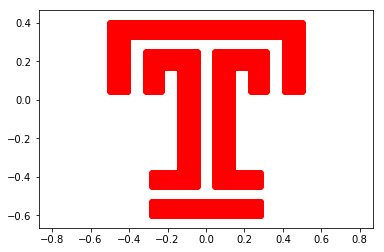

In [23]:
A = np.loadtxt('d_temple.csv', delimiter=",",dtype='float')
print A
print 'The dimensions of A are: ' , np.shape(A)
plt.scatter(A[:,0],A[:,1],color='red');
plt.axis('equal');

Let us see the effect of some transformations of A.

[[ 0.385511    0.90298408]
 [ 0.79769331  0.80051652]]


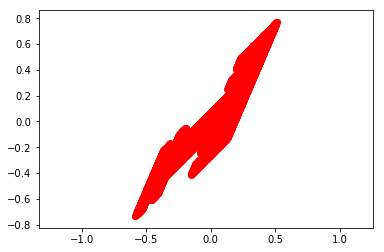

In [26]:
# Generate a random "projection" matrix
T = np.random.rand(2,2)
print T
# Multiply A with R #do you mean T?
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

[[1, 0], [0, 0.5]]


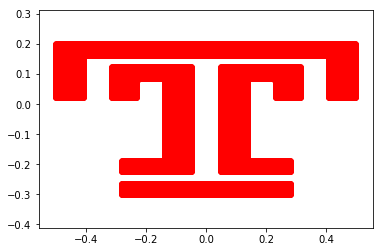

In [60]:
# Generate a "scaling" matrix
T = [[1,0],[0,3]]
print T
# Multiply A with R #T?
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

[[0.45359612142557731, 0.89120736006143542], [-0.89120736006143542, 0.45359612142557731]]


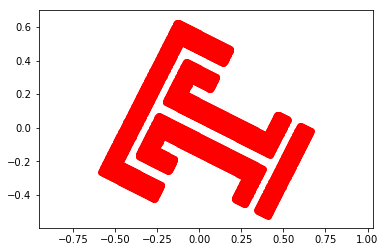

In [48]:
# Generate a "rotation" matrix
angle = 1.1
T = [[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]]
print T
# Multiply A with R #T?
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

In [50]:
print A.shape
#A = 28226 x 2          T = 2x whatever

(28226L, 2L)


**Question 4**. Create a letter T that is 2 times wider than its original version and then rotated by 145 degrees counterclock-wise.

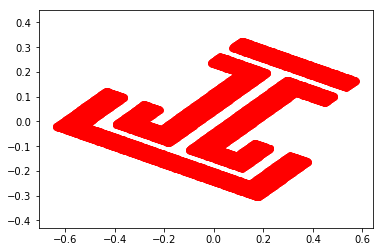

In [62]:
angle = 145 * np.pi / 180 #angle to radians
T = [[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]] #rotation matrix
A2 = np.dot(A,T)
A3 = np.dot(A2, [[1,0],[0,.5]]) #2 times wider

plt.scatter(A3[:,0],A3[:,1],color='red');
plt.axis('equal');

Let us now create a rank-2 large matrix out of Temple data, which has 100 attributes (columns).

(28226L, 100L)


C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


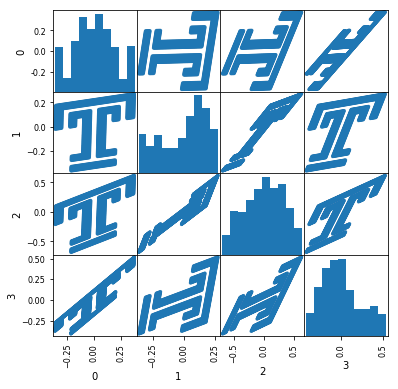

In [63]:
T = np.random.rand(2,100)
Abig = np.dot(A, T)
print np.shape(Abig)
# to plot a scatterplot of the first 4 columns... it will take a minute...
import pandas as pd 
pd.scatter_matrix(pd.DataFrame(Abig[:,1:5]), alpha=0.2, figsize=(6, 6));

**Question 5**. What is the rank of `Abig` and why?

Let us perform SVD on matrix `Abig`.

**Question 5 Answer: **

`Abig` is rank 2. `Abig = A x T`, and `A` and `T` are rank 2, so `Abig` is rank 2.

In [67]:
# SVD
U,s,V = np.linalg.svd(Abig,full_matrices=0)
print U.shape, s.shape, V.shape
print 'the first 10 singular values:', s[0:10]

(28226L, 100L) (100L,) (100L, 100L)
the first 10 singular values: [  3.79916739e+02   1.43130115e+02   8.84995414e-14   4.84121989e-14
   3.95120365e-14   3.26752695e-14   3.26752695e-14   3.26752695e-14
   3.26752695e-14   3.26752695e-14]


Let us find a rank-2 approximation of `Abig`

In [68]:
# Find rank-2 aproximation
k = 2
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print 'Norm of Abig:  ', np.linalg.norm(Abig, ord=2)
print 'First 10 singular values: ',  s[0:10]
print 'Norm of difference Abig-Ak = ', np.linalg.norm(Abig - Ak, ord=2)


Norm of Abig:   379.916739073
First 10 singular values:  [  3.79916739e+02   1.43130115e+02   8.84995414e-14   4.84121989e-14
   3.95120365e-14   3.26752695e-14   3.26752695e-14   3.26752695e-14
   3.26752695e-14   3.26752695e-14]
Norm of difference Abig-Ak =  2.59550327026e-13


**Question 6**.
- Find the Frobenius norm of the difference `Abig - Ak`
- Find rank-1 approximation of `Abig`. What is the 2 norm and Frobenius norm of the difference? Discuss.
- Find rank-3 approximation of `Abig`. What is the 2 norm and Frobenius norm of the difference? Discuss.

In [76]:
print 'Frobenius Norm of difference Abig-Ak = ', np.linalg.norm(Abig - Ak, ord='fro')
print ''
k = 1
Ak1 = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print 'Frobenius Norm of difference Abig-Ak1 = ', np.linalg.norm(Abig - Ak1, ord='fro')
print '2-Norm of difference Abig-Ak1 = ', np.linalg.norm(Abig - Ak1, ord=2)
# Frobenius norm and 2 norm are the same. Since it is a rank1 approximation, it is a vector, and the Frobenius
# norm for vectors is the 2 norm, thus they are the same
#This is the second largest singular value

print ''
k = 3
Ak3 = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print 'Frobenius Norm of difference Abig-Ak3 = ', np.linalg.norm(Abig - Ak3, ord='fro')
print '2-Norm of difference Abig-Ak3 = ', np.linalg.norm(Abig - Ak3, ord=2)
#There is no rank3 approximation since Abig is only rank 2
#Thus a rank 2 approximation is almost Abig, and so the difference is very small

Frobenius Norm of difference Abig-Ak =  2.85848628445e-13

Frobenius Norm of difference Abig-Ak1 =  143.13011475
2-Norm of difference Abig-Ak1 =  143.13011475

Frobenius Norm of difference Abig-Ak3 =  2.99202362262e-13
2-Norm of difference Abig-Ak3 =  2.63460955638e-13


Let us visualize the scatter-plot of the first two columns of `U` (the first two left singular vectors)

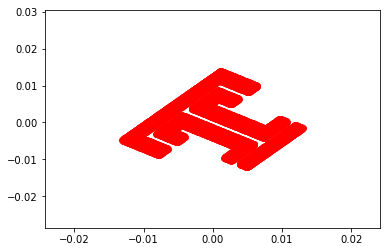

In [89]:
plt.scatter(U[:,0],U[:,1],color='red');

Perfect:  the first two columns of `U` are sufficient to reconstruct letter T!

Let us generate a noisy version of `Abig`

In [90]:
Abig_noise = Abig + np.random.randn(28226,100)*0.5 

**Question 7**. 
- Plot the scatterplot of the first 5 columns of `Abig_noise`. Discuss what you see.
- Perform SVD on `Abig_noise`. What are the first 10 singular values?
- Find the rank-2 approximation of this `Abig_noise`. What is the norm of the difference?
- Plot the scatterplot of the first two columns of `U`. Discuss what you see and why.

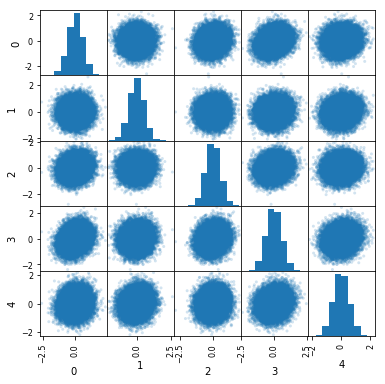

In [99]:
pd.plotting.scatter_matrix(pd.DataFrame(Abig_noise[:,:5]), alpha=0.2, figsize=(6, 6));

In [101]:
U,s,V = np.linalg.svd(Abig,full_matrices=0)

print 'the first 10 singular values:', s[0:10]

the first 10 singular values: [  3.79916739e+02   1.43130115e+02   8.84995414e-14   4.84121989e-14
   3.95120365e-14   3.26752695e-14   3.26752695e-14   3.26752695e-14
   3.26752695e-14   3.26752695e-14]


In [103]:
k = 2
A_noise_k = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))

print 'Norm of difference Abig-A_noise_k = ', np.linalg.norm(Abig - A_noise_k, ord=2)
#small, because Abig is rank 2

Norm of difference Abig-A_noise_k =  2.59550327026e-13


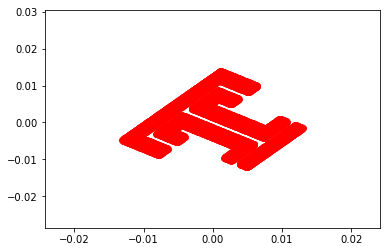

In [105]:
plt.scatter(U[:,0],U[:,1],color='red');
#The same as before! because Abig is rank 2, so the rank 2 approximation of Abig_noise will be very similar

## Lab 5.B: Apply SVD on real data (75% of the lab grade)

In this par tof the lab you will be studying 2 real-life data sets: *Iris* and *Newsgroups*.

### Iris Data Analysis
Download `iris.csv` file to your local folder. This is a famous data set for benchmarking of data science algorithms. You can access the original data from https://archive.ics.uci.edu/ml/datasets/Iris and you can learn more about it from https://en.wikipedia.org/wiki/Iris_flower_data_set. Please take a moment to read about it.

Load `iris.csv` into Python:

In [106]:
# load the matrix
d = np.loadtxt('iris.csv', delimiter=",",usecols=(0,1,2,3))
# with the following command you will create a vector that reveals what type of Iris is represented in each row
y = np.array([1]*50+[2]*50+[3]*50)

**Question 8**.
- How large is the data set?
- Plot the scatter plot ofr each pair of the attributes. Do you see any correlations? What are the correlations between the attributes?
- Plot the scatterplot between the first two attributes, but this type use different color for different values of `y`. Can you clearly discriminate between different colors on the scatterplot? Plot the same type of the scatter plot, but this time  using different pairs of attributes. Which pair of attributes separates the colors the best?
- What is the rank of `d`?

**Question 9**. Apply SVD on matrix `d`. 
- Look at the singular values. What do they tell us about the possibility to approximate `d` with a lower rank matrix?
- Calculate rank-2 approximation of `d`. Let us call it `d2`. Plot the scatterplot for each pair of attributes in `d2` and use `y` to color the dots. Is it easier or more difficult to distinguish different values of `y`?
- Plot the scatter plot of the first 2 columns of the `U` matrix (the left singular matrix). Is it easier or more dificult to distinguish between different values of `y`? Please discuss your findings.

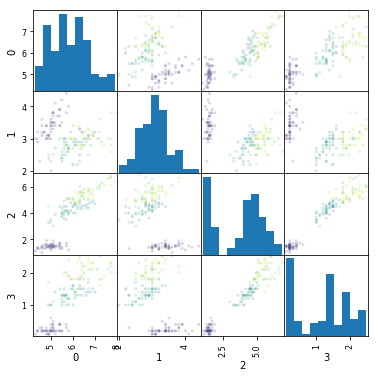

In [155]:
#Question 8
#The data set is 150 elements with 4 features
pd.plotting.scatter_matrix(pd.DataFrame(d), alpha=0.2, figsize=(6, 6), c=np.arange(150));
#You can see some correlations between attribute pairs (1,3), (1,4), (3,4). These are all positive correlations
#in some other pairs, there are pretty defined clusters

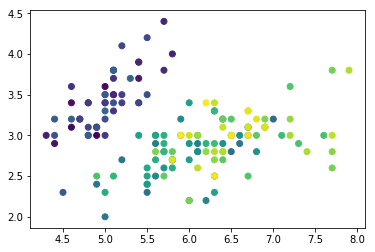

In [131]:
#first two columns
plt.scatter(d[:,0],d[:,1], c=np.arange(150), cmap = 'viridis');

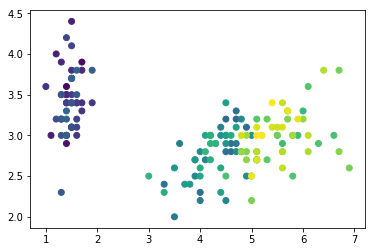

In [137]:
plt.scatter(d[:,2],d[:,1], c=np.arange(150), cmap = 'viridis');

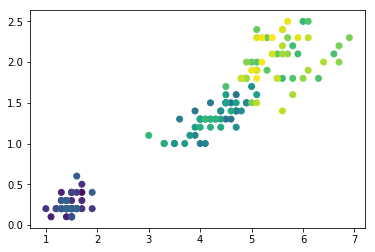

In [138]:
#probably the best separation
plt.scatter(d[:,2],d[:,3], c=np.arange(150), cmap = 'viridis');

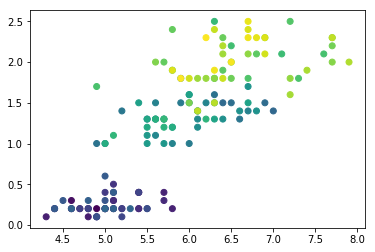

In [144]:
#another good one
plt.scatter(d[:,0],d[:,3], c=np.arange(150), cmap = 'viridis');

In [147]:
#Rank of d
np.linalg.matrix_rank(d)

4

In [156]:
#Question 9
#svd
U,s,V = np.linalg.svd(d,full_matrices=0)

#singular values
print s
#95, 17, 3, 1 --> this implies that the vast majority of the data is in two columns

[ 95.95066751  17.72295328   3.46929666   1.87891236]


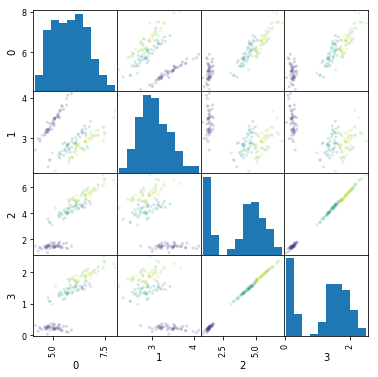

In [158]:
#rank 2 approx with scatter matrix
k = 2
d2 = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
pd.plotting.scatter_matrix(pd.DataFrame(d2), alpha=0.2, figsize=(6, 6), c=np.arange(150));

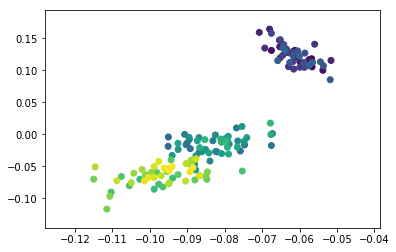

In [159]:
plt.scatter(U[:,0],U[:,1], c=np.arange(150), cmap = 'viridis');
#The purple are are still together, but now it is much easier to tell apart the other two clusters. 
#Before, they were mostly one cluster

### Newsgoups data analysis

Download `documents.csv`, `newsgroup.csv`, `groupnames.csv`, `wordlist.csv` to your local folder. This data set is about 16,242 news articles. Each article is represented as a bag-of-word vector containing counts of 100 words from a dictionary. This is saved in `documents`. The dictionary words are represented in the `wordlist`. Each document belongs to one of the 4 types of articles, listed in `froupnames`. We know the assignment of each document to one of those groups based on `newsgroup` values.

In [3]:
wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')

**Question 9**. 
- find the counts of each of the 100 words and plot the bar plot of the counts. Which words are the most popular?
- find the counts of the 4 types of articles in the documents. Which type of article is the most popular?

Since the `documents` matrix is huge, we cannot do too much to further explore it. That is why we will try with the SVD.

**Question 10**.
- what is the rank of `documents`?
- perform SVD of documents
- list the first 10 singular values. Plot all 100 singular values. What can we conclude with the respect to low-rank approximation of the matrix?
- let us plot the scatterplot of the first 2 columns of `V`. What do you see?
- use plt.text method to plot the name of each dot (use `wordlist` values) above each dot. Discuss what you see.
- let us plot the scatterplot of the first 2 columns of `U`. What do you see?
- use plt.text method to plot the name of each dot (use the newsgroup values`) above each dot. Discuss what you see.


The following lines of code will be useful for plotting. Consider reusing them in your study:

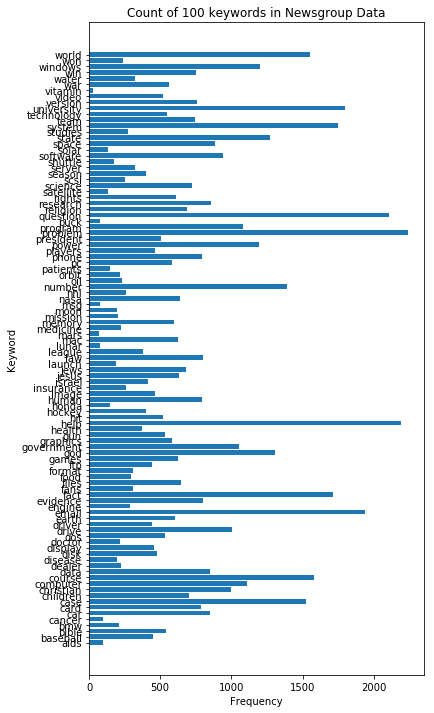

In [57]:
#Question 9
wordcounts = [0]*100    
for doc in documents:
    for word_num in range(100):
        if doc[word_num]:
            wordcounts[word_num] += 1

stripped_words = []
for word in wordlist:
    stripped_words.append(word.replace('"', ''))
    
# wordcounts = dict(zip(stripped_words, wordcounts))
plt.figure(figsize = (6,12))
plt.barh(range(len(stripped_words)), wordcounts, linewidth = 10)
plt.yticks(range(len(stripped_words)), stripped_words, fontsize = 10)
plt.title('Count of 100 keywords in Newsgroup Data')
plt.xlabel('Frequency')
plt.ylabel('Keyword')

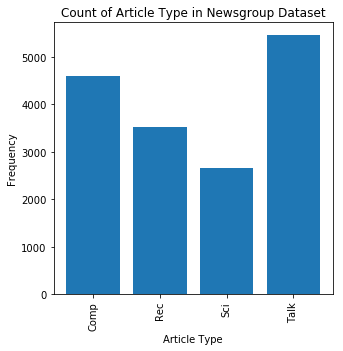

In [76]:
unique, counts = np.unique(newsgroup, return_counts=True)
names = np.array(['Comp', 'Rec', 'Sci', 'Talk'])
article_count = dict(zip(names, counts))

plt.figure(figsize = (5,5))
plt.bar(range(len(names)), counts, linewidth = 10)
plt.xticks(range(len(names)), names, rotation = 90)
plt.title('Count of Article Type in Newsgroup Dataset')
plt.ylabel('Frequency')
plt.xlabel('Article Type')

Rank of documents:  100
Top 10 singular values [ 85.83514637  56.41449164  44.17905789  43.1547786   41.97727192
  40.83237512  40.44698116  39.35243106  38.69233467  36.93978716]


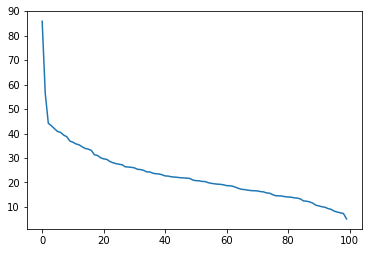

In [88]:
#Question 9
print 'Rank of documents: ',np.linalg.matrix_rank(documents)

U,s,V=np.linalg.svd(documents,full_matrices=0)

print 'Top 10 singular values',s[:10]

plt.plot(s) #we can conclude that the low rank approximation holds a lot of the information, but not all

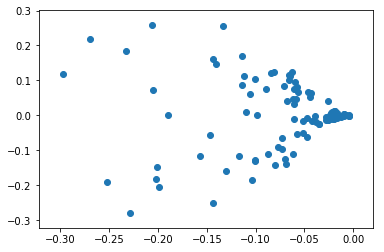

In [100]:
plt.scatter(V[0,:], V[1,:]) #first two columns of U
#we can see which documents are close to one another--the rank 2 approximation lets us graph a 100 dimension matrix in 2d

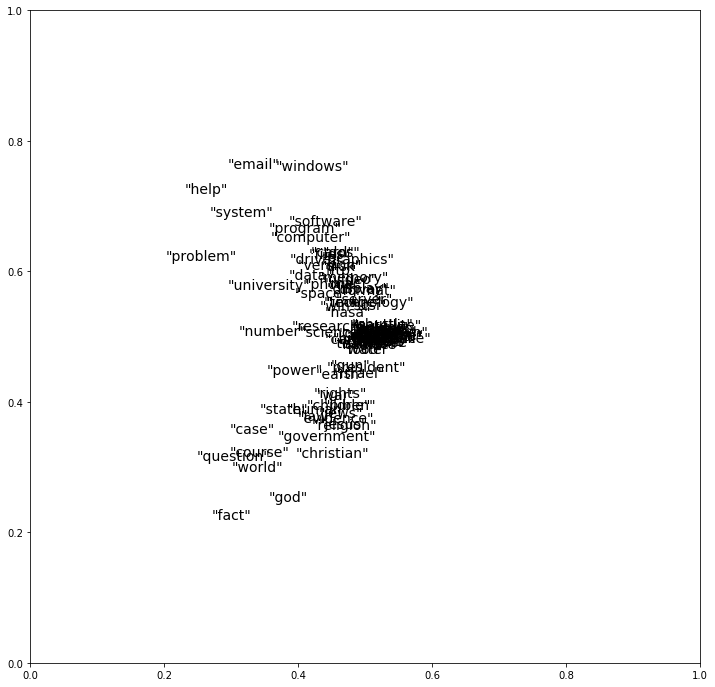

In [97]:
#with text added
plt.figure(figsize=(12,12))
for x,y,text in zip(V[0]+0.5,V[1]+0.5,wordlist):
    plt.text(x,y,text,fontsize=14)
plt.figure()
#We can see how the different words are grouped and which words are close by -- like 'email', 'windows', and 'system'

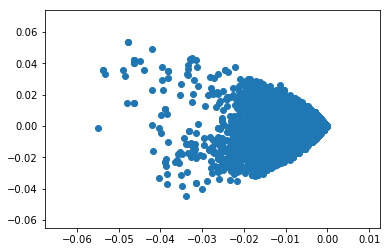

In [103]:
plt.scatter(U[:,0], U[:,1]) #first two columns of U
#This is showing us which documents are close to one another

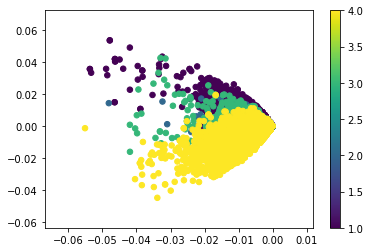

In [113]:
#color for the newsgroup, can see clusters of newsgroup but many are in the middle
sc=plt.scatter(U[:,0],U[:,1],30,newsgroup,facecolors='none')
plt.colorbar(sc)
plt.show()

[0.45, 0.55, 0.45, 0.55]

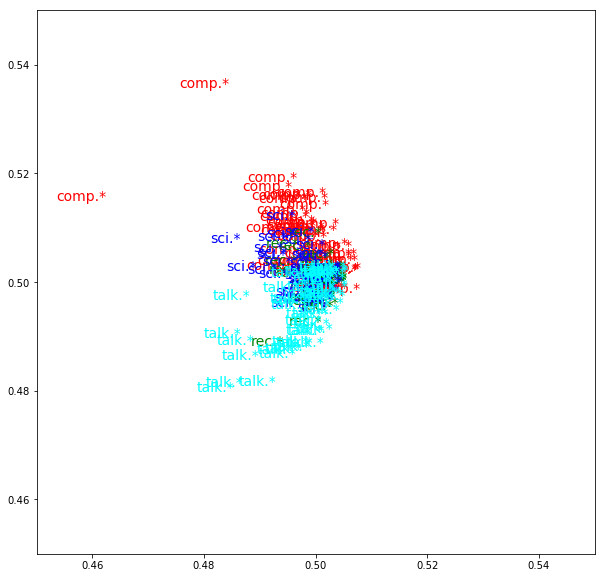

In [111]:
#zoomed in, with color, and labels of document type instead of points
c = ['red','green','blue','cyan']
plt.figure(figsize = (10,10))
for i in range(1,5):
    q=np.where(newsgroup==i)[0]
    r1 = np.random.randint(0,len(q),50)
    r=q[r1]
    for x,y,groupname in zip(U[r,0]+0.5,U[r,1]+0.5,groupnames[newsgroup[r]-1]):
        plt.text(x,y,groupname,color=c[i-1],fontsize=14)
plt.axis([0.45,0.55,0.45,0.55])
#This shows us how the 16,000 documents, labeled by type, are related
#You can make out distinct clusters of types of documents

In [117]:
# U,s,V=np.linalg.svd(documents,full_matrices=0)
# for x,y,text in zip(V[0]+0.5,V[1]+0.5,wordlist):
#     plt.text(x,y,text,fontsize=14)
# plt.figure()

# sc=plt.scatter(U[:,0],U[:,1],30,newsgroup,facecolors='none')
# plt.colorbar(sc)
# plt.show()

# r=np.random.randint(0,16242,100)
# plt.figure()
# for x,y,groupname in zip(U[r,0]+0.5,U[r,1]+0.5,groupnames[newsgroup[r]-1]):
#     plt.text(x,y,groupname,fontsize=14)

# c = ['red','green','blue','cyan']
# plt.figure()
# for i in range(1,5):
#     q=np.where(newsgroup==i)[0]
#     r1 = np.random.randint(0,len(q),50)
#     r=q[r1]
#     for x,y,groupname in zip(U[r,0]+0.5,U[r,1]+0.5,groupnames[newsgroup[r]-1]):
#         plt.text(x,y,groupname,color=c[i-1],fontsize=14)
#     print i